## Model description

The following seven-dimensional continuous model is adapted from a biological system [1, 2]. The modeling ODE is given as below.

$$ 
\left\{   \begin{array}{lcl}    \dot{x}_1 & = & -0.4\cdot x_1 + 5\cdot x_3 \cdot x_4 \\    \dot{x}_2 & = & 0.4\cdot x_1 - x_2 \\    \dot{x}_3 & = & x_2 - 5\cdot x_3 \cdot x_4 \\    \dot{x}_4 & = & 5\cdot x_5 \cdot x_6 - 5\cdot x_3 \cdot x_4 \\    \dot{x}_5 & = & -5\cdot x_5\cdot x_6 + 5\cdot x_3 \cdot x_4 \\    \dot{x}_6 & = & 0.5\cdot x_7 - 5\cdot x_5\cdot x_6 \\    \dot{x}_7 & = & -0.5\cdot x_7 + 5\cdot x_5\cdot x_6   \end{array}   \right.
$$

In [1]:
using Reachability, MathematicalSystems, TaylorIntegration

[1] https://ths.rwth-aachen.de/research/projects/hypro/steam-governor/

[2] E. Klipp, R. Herwig, A. Kowald, C. Wierling, H. Lehrach. *Systems Biology in Practice: Concepts, Implementation and Application.* Wiley-Blackwell, 2005.

In [2]:
@taylorize function biomodel7d!(dx, x, p, t)
    dx[1] = -0.4 * x[1] + 5.0 * x[3] * x[4]
    dx[2] = 0.4 * x[1] - x[2]
    dx[3] = x[2] - 5.0 * x[3] * x[4]
    dx[4] = 5.0 * x[5] * x[6] - 5.0 * x[3] * x[4]
    dx[5] = -5.0 * x[5] * x[6] + 5.0 * x[3] * x[4]
    dx[6] = 0.5 * x[7] - 5.0 * x[5] * x[6]
    dx[7] = -0.5 * x[7] + 5.0 * x[5] * x[6]
    return dx
end

## Reachability settings

We consider the initial set $x_1,x_2,x_3,x_4,x_5,x_6,x_7\in [0.99,1.01]$.

These settings are taken from the HyPro benchmarks [1].

In [3]:
X₀ = Hyperrectangle(low=fill(0.99, 7), high=fill(1.01, 7))

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009])

In [4]:
S = BlackBoxContinuousSystem(biomodel7d!, 7)
P = InitialValueProblem(S, X₀);

## Results

Next we compute an overapproximation of the flowpipe using the TMJets algorithm for the time horizon $[0, 2]$.

In [5]:
sol = solve(P, Options(:T=>2.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings

Since the flowpipe is three-dimensional, we have to project it for 2D plotting. The following function, `_project`, takes a flowpipe represented with zonotopes and gets the projection (which is also a zonotope) onto the given dimensions.

In [7]:
using SparseArrays

function _project(sol, x, y)
    n = dim(set(first(sol.Xk)))
    M = sparse([1, 2], [x, y], [1.0, 1.0], 2, n)
    πsol = Vector{Zonotope{Float64}}()
    for s in sol.Xk
        πs = linear_map(M, set(s))
        push!(πsol, πs)
    end
    return πsol
end

_project (generic function with 1 method)

For plotting we project onto dimensions $x_3 - x_4$ and $x_5 - x_7$:

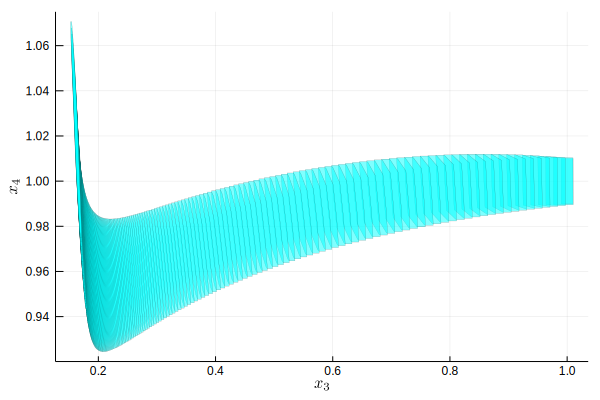

In [8]:
πsol = _project(sol, 3, 4)
plot(πsol, xlab=L"x_3", ylab=L"x_4", lw=0.2, color=:cyan, lab="")

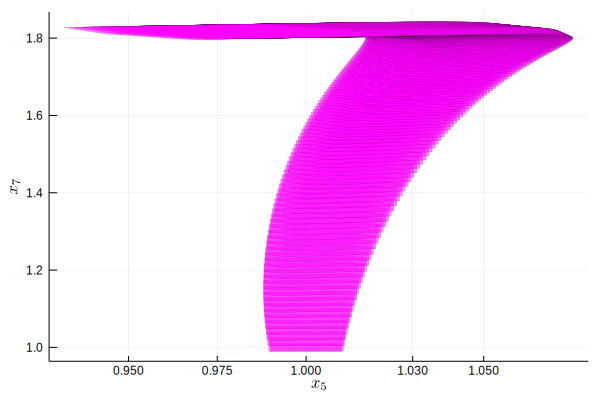

In [9]:
πsol = _project(sol, 5, 7)
plot(πsol, xlab=L"x_5", ylab=L"x_7", lw=0.2, color=:magenta, lab="")